In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

In [2]:
#!pip install mediapipe
import mediapipe as mp

In [3]:
mpPose = mp.solutions.pose
pose = mpPose.Pose(static_image_mode=True)
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
path=r"C:/Users/Asus/Downloads/IPML_Project/YogaData/train"
folders=["downdog","goddess","plank","tree","warrior2"]

In [6]:
img_size = 256

training_data = []
training_labels = []

In [7]:
%%time
training_data=[]
training_labels=[]
hits=0
miss=0
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
      if hits%100==0:
        print(f"hits,{hits}")
      img_path = os.path.join(folder_path, img_file)

      img = cv2.imread(img_path)
      img = cv2.resize(img, (img_size, img_size))
      # imageWidth, imageHeight = img.shape[:2]

      imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      blackie = np.zeros(img.shape) # Blank image

      results = pose.process(imgRGB)
      if results.pose_landmarks:

        # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

        mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

        # landmarks = results.pose_landmarks.landmark
        hits+=1
        black_image=cv2.resize(blackie, (img_size, img_size))
        black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
        black_image=black_image/255.0
        training_data.append(black_image)
        training_labels.append(folders.index(folder))
      else:
        miss+=1
        # images.append(img)

hits,0
hits,100
hits,200
hits,200
hits,300
hits,400
hits,500
hits,600
hits,700
hits,800
hits,900
hits,1000
hits,1100
hits,1200
hits,1300
hits,1400
hits,1500
hits,1600
hits,1700
CPU times: total: 1min 37s
Wall time: 2min 21s


In [8]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
count=0
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    channel_shift_range=0.2)
 
augmented_data = []
augmented_labels = []
 
for folder in folders:
    print(folder,count)    
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = img / 255.0

        # augmented_data.append(img)
        # augmented_labels.append(folders.index(folder)) 
        img = img.reshape((1,) + img.shape)
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0]
            blackie = np.zeros(augmented_img.shape) # Blank image

            results = pose.process(augmented_img.astype("uint8"))
            if results.pose_landmarks:
              # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

              mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

              # landmarks = results.pose_landmarks.landmark
              black_image=cv2.resize(blackie, (img_size, img_size))
              black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
              black_image=black_image/255.0
              training_data.append(black_image)
              training_labels.append(folders.index(folder))
            break



downdog 0
goddess 0
plank 0
tree 0
warrior2 0
CPU times: total: 2min 9s
Wall time: 2min 44s


In [9]:
training_data = np.array(training_data)
training_labels = np.array(training_labels)
 
print("Training data shape:", training_data.shape)
print("Training labels shape:", training_labels.shape)

Training data shape: (3370, 256, 256)
Training labels shape: (3370,)


In [10]:
%%time

hits=0
miss=0
test_path = r"C:/Users/Asus/Downloads/IPML_Project/YogaData/test"
test_data = []
test_labels = []
count=0
for folder in folders:
    folder_path = os.path.join(test_path, folder)
    for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)

      img = cv2.imread(img_path)
      # imageWidth, imageHeight = img.shape[:2]
      img=cv2.resize(img, (img_size, img_size))
      imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
      blackie = np.zeros(img.shape) # Blank image

      results = pose.process(imgRGB)
      if results.pose_landmarks:

        # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

        mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

        # landmarks = results.pose_landmarks.landmark
        hits+=1
        black_image=cv2.resize(blackie, (img_size, img_size))
        black_image = cv2.cvtColor(black_image.astype('float32'), cv2.COLOR_BGR2GRAY)
        black_image=black_image/255.0
        test_data.append(black_image)
        test_labels.append(folders.index(folder))
        count += 1
        if count % 100 == 0:
          print(count)
      else:
        miss+=1
        # images.append(img)


print(hits,miss)


100
200
300
400
405 10
CPU times: total: 26.5 s
Wall time: 44.9 s


In [11]:

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [13]:
print(training_data.shape)
training_data = training_data.reshape(3370,65536)
print(training_data.shape)
test_data = test_data.reshape(test_data.shape[0],65536)
print(test_data.shape)

(3370, 256, 256)
(3370, 65536)
(405, 65536)


In [14]:
# Step 3: Apply PCA dimensionality reduction
d = 100
ls = 20
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(training_data)
print(sum(pca.explained_variance_ratio_))
# Construct a KD-Tree from the MNIST training data
kdtree = KDTree(X_train_pca, leaf_size=ls)

0.28793736558873206


In [32]:
# Choose a random image from the test set
#idx = np.random.randint(test_data.shape[0])
acc = 0
predicted_labels = []

for idx in range(test_data.shape[0]):

  query_image = test_data[idx]

  # Apply PCA dimensionality reduction to the query image
  query_image_pca = pca.transform(query_image.reshape(1, -1))

  # Perform a KD-Tree search 
  distances, indices = kdtree.query(query_image_pca, k=4)

  #print(distances)
  #print(training_labels[indices])
  #print(test_labels[idx])

  lab_lst = np.zeros(5)
  indices = indices.reshape(-1)

  for i in list(indices):
    #print(training_labels[idx])
    lab_lst[training_labels[i]] = lab_lst[training_labels[i]]+1
    #print(lab_lst)

  #print(lab_lst)
  #print(np.argmax(lab_lst))
    
  pred = np.argmax(lab_lst)
  predicted_labels.append(pred)

  if pred==test_labels[idx]:
    acc+=1


print(acc/test_labels.shape[0])



0.8518518518518519


In [16]:
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [35]:
predicted_labels = np.array(predicted_labels)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
cm = confusion_matrix(test_labels, predicted_labels)



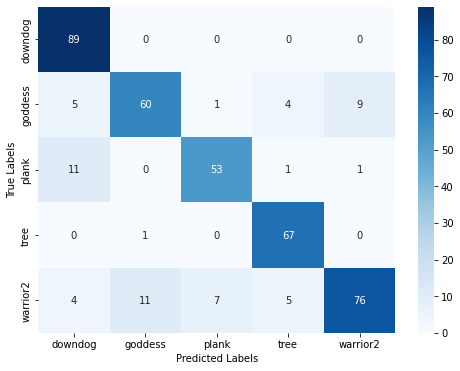

In [38]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [39]:
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=folders))


Classification Report:
              precision    recall  f1-score   support

     downdog       0.82      1.00      0.90        89
     goddess       0.83      0.76      0.79        79
       plank       0.87      0.80      0.83        66
        tree       0.87      0.99      0.92        68
    warrior2       0.88      0.74      0.80       103

    accuracy                           0.85       405
   macro avg       0.85      0.86      0.85       405
weighted avg       0.85      0.85      0.85       405

